A Markov Chain is a set of states and relationship matrix of transfering from one to another. Burning a Markov Chain to equilibriium by sampling is called MCMC.  
Markov Property:
$$
P[X_{t+1}=y|X_t=x_t, \dots, X_0=x_o] = P[X_{t+1}=y|X_t=x_t]
$$

1. Must transfer to some state: $\sum_j P_{ji} = 1$  
2. Must be some state: $\sum_i \pi(i) = 1$

In [2]:
import tensorflow as tf
import torchvision.datasets as ds
import numpy as np

In [3]:
data = ds.MNIST(root='/Users/ellise/Desktop/datasets/MNIST_data/', train=True, download=False)
X_train = data.train_data
y_train = data.train_labels
print(X_train.shape, y_train.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])


In [8]:
# 需要将y_train处理成one-hot vector
y_one_hot = tf.one_hot(y_train, depth=10)

In [7]:
tf.reset_default_graph()
inputs = tf.placeholder(tf.float32, shape=[None, 28, 28])
y = tf.placeholder(tf.int16, shape=[None, 1])
def classifier(x):
    with tf.variable_scope("classifier", reuse=False):
        x = tf.layers.flatten(x)
        h1 = tf.layers.dense(inputs=x, units=512, activation=tf.nn.relu)
        h2 = tf.layers.dense(inputs=h1, units=128, activation=tf.nn.relu)
        out = tf.layers.dense(inputs=h2, units=10, activation=None)
    return out

y_hat = classifier(inputs)
loss = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_hat)
opt = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)
with tf.Session() as sess:
    for epoch in range(100):
        # feed in batch_data
        loss_, _ = sess.run([loss, opt], feed_dict={inputs: , y: })



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Constrast Normalization

In [45]:
# 取一张图片
img = X_train[0].numpy()
# constrast: root(sum (x_ij - x_mean)^2)
x_mean = np.mean(img)
contrast = np.sqrt(np.mean((img - x_mean)**2))
print("contrast:{}".format(contrast))
img_ = (img - x_mean) / contrast

contrast:79.64882892760731


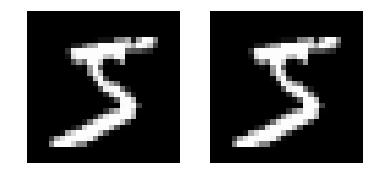

In [43]:
import matplotlib.pyplot as plt
# plot before and after operation
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_, cmap='gray')
plt.axis('off')
plt.show()
# 似乎并没有什么区别，查看deivation

In [44]:
np.std(img), np.std(img_) # std 被normalized到1了
# 其实contrast即使std

(79.64882892760731, 1.0)

In [ ]:
13922822000